In [1]:
import pandas as pd
import numpy as np 
import re

In [2]:
phishing_raw_df = pd.read_csv("C:/Users/mouni/OneDrive/Documents/SEM 2/Machine Learning/project/source_dataset.csv", header = 0)
phishing_raw_df = phishing_raw_df.dropna()
phishing_raw_df.shape

(95910, 12)

In [3]:
# import lux
# phishing_raw_df

In [4]:
print(phishing_raw_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95910 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          95910 non-null  object
 1   ranking         95910 non-null  int64 
 2   isIp            95910 non-null  int64 
 3   valid           95910 non-null  int64 
 4   activeDuration  95910 non-null  int64 
 5   urlLen          95910 non-null  int64 
 6   is@             95910 non-null  int64 
 7   isredirect      95910 non-null  int64 
 8   haveDash        95910 non-null  int64 
 9   domainLen       95910 non-null  int64 
 10  nosOfSubdomain  95910 non-null  int64 
 11  label           95910 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 9.5+ MB
None


In [5]:
phishing_raw_df=phishing_raw_df.drop_duplicates()

In [6]:
# import lux
# lux.config.default_display = "lux"
# lux.config.plotting_backend = "matplotlib"
# phishing_raw_df

In [7]:
phishing_raw_df

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95902,www.angelfire.com/tx4/PolkLonghorns/,2547,0,1,8035,36,0,0,0,17,2,0
95903,www.freewebs.com/aylesburyscrabble/index.htm,5001,0,1,8035,44,0,0,0,16,2,0
95905,www.freewebs.com/ryanrules2/,5001,0,1,8035,28,0,0,0,16,2,0
95907,www.clubtaunus.soroptimist.de/img/pro/e.php,10000000,0,0,0,43,0,0,0,29,3,1


In [8]:
#we can conclude no duplicate values were present
#See if we have any null values present, here True represents the value is null and false represents the data is not null
print( phishing_raw_df.isnull()) 
  
# Count of null values in each column 
print(" \nCount of null values in each column  : \n\n", 
      phishing_raw_df.isnull().sum())

       domain  ranking   isIp  valid  activeDuration  urlLen    is@  \
0       False    False  False  False           False   False  False   
1       False    False  False  False           False   False  False   
2       False    False  False  False           False   False  False   
3       False    False  False  False           False   False  False   
4       False    False  False  False           False   False  False   
...       ...      ...    ...    ...             ...     ...    ...   
95902   False    False  False  False           False   False  False   
95903   False    False  False  False           False   False  False   
95905   False    False  False  False           False   False  False   
95907   False    False  False  False           False   False  False   
95909   False    False  False  False           False   False  False   

       isredirect  haveDash  domainLen  nosOfSubdomain  label  
0           False     False      False           False  False  
1           False  

In [9]:
phishing_raw_df.groupby(["label"])[["label"]].count()

,label
label,
0,31025
1,41338


In [10]:
# Function to check for '//' or 'http' in the domain part of the URL
# Returns 1 if '//' is found within length of 7 for the given URL or if 'http' is found else returns 0
# Legitimate - 0; Phishing - 1

def regexp_check(str_to_check,url):
    if str_to_check == '//':
        double_slash = re.search(str_to_check,url)
        if double_slash:
            if double_slash.start() > 7:
                return 1
            else:
                return 0
        else:
            return 0
    else:
        http_domain = re.search('http',url)
        if http_domain:
            return 1
        else:
            return 0

In [11]:
# Feature engineering

# Insert a new column to the dataframe which shows if the URL has a '//' in the domain part.
phishing_raw_df["dslash_Redirect"] = phishing_raw_df["domain"].apply( lambda x: regexp_check('//',x))

# Insert a new column to the dataframe which shows if 'http' is found in the domain part of the URL.
phishing_raw_df["Domain_http"] = phishing_raw_df["domain"].apply( lambda x: regexp_check('http',x))

# Insert a new column to the dataframe indication the length of the URL.
# If the lenght is less than 54 then it is a legitimate site else it is a phishing site.
phishing_raw_df["LongURL"] = phishing_raw_df["domain"].apply( lambda x: 0 if len(x) < 54 else 1)

# Alter the values in 'nosOfSubdomain' column of the dataframe.
# If the number of sub domains is more than 1, then it is a phishing site.
phishing_raw_df["nosOfSubdomain"] = phishing_raw_df["nosOfSubdomain"].apply( lambda x: 0 if x ==1 else 1)

# Alter the values in 'activeDuration' column of the dataframe.
# If the value is greater than 365 (1 year), then it is a legitimate site.
phishing_raw_df["activeDuration"] = phishing_raw_df["activeDuration"].apply( lambda x: 1 if x <= 365 else 0)

# Alter the values in the dataframe column 'ranking'
# If the value is greater than 100000, then it is a phishing site
phishing_raw_df["ranking"] = phishing_raw_df["ranking"].apply( lambda x: 0 if x < 100000 else 1)

# Remove the unwanted columns from the dataframe
phishing_raw_df.drop(['urlLen','domainLen','domain'], inplace=True,axis=1)

# Reorder and rename the columns in the dataframe
#new_columns = ['Domain','Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','dslash_Redirect','Domain_http','LongURL','Label']
Columns = ['Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','Label','dslash_Redirect','Domain_http','LongURL']
new_columns = ['Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','dslash_Redirect','Domain_http','LongURL','Label']
phishing_raw_df.columns = Columns
phishing_raw_df = phishing_raw_df.reindex(columns=new_columns)

#Display the dataset after feature engineering
phishing_raw_df.head()

,Rank,isIP,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,LongURL,Label
0,1,0,0,1,0,0,1,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,1,1
3,0,0,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,1,0,0,0,1,1


In [12]:
phishing_raw_df.describe()

,Rank,isIP,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,LongURL,Label
count,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000
mean,0.691610,0.000207,0.574727,0.430980,0.002709,0.007504,0.155508,0.767768,0.007476,0.019527,0.389343,0.571259
std,0.461832,0.014396,0.494388,0.495217,0.051974,0.086300,0.362390,0.422259,0.086142,0.138367,0.487605,0.494900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
correlation_matrix=phishing_raw_df.corr()
correlation_matrix

,Rank,isIP,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,LongURL,Label
Rank,1.000000,0.005458,-0.231109,0.238418,0.018679,0.054249,0.082184,-0.205399,0.054134,0.076070,0.250107,0.434559
isIP,0.005458,1.000000,0.002678,-0.002839,-0.000750,-0.001252,-0.000881,0.007919,-0.001250,-0.002032,-0.003623,0.012474
isValid,-0.231109,0.002678,1.000000,-0.988412,-0.023474,-0.025289,-0.127765,0.093358,-0.025287,0.008265,-0.149758,-0.262586
Domain_reg_len,0.238418,-0.002839,-0.988412,1.000000,0.022834,0.026185,0.129690,-0.097239,0.025864,-0.002818,0.155585,0.269988
is@,0.018679,-0.000750,-0.023474,0.022834,1.000000,-0.004531,-0.000352,-0.014787,-0.004523,0.000332,0.055997,0.040313
isRedirect,0.054249,-0.001252,-0.025289,0.026185,-0.004531,1.000000,-0.005497,-0.034092,0.998143,-0.001855,0.034019,0.075328
haveDash,0.082184,-0.000881,-0.127765,0.129690,-0.000352,-0.005497,1.000000,0.059000,-0.005370,0.014681,0.234756,0.239609
SubDomain,-0.205399,0.007919,0.093358,-0.097239,-0.014787,-0.034092,0.059000,1.000000,-0.033571,-0.008717,-0.072226,-0.314180
dslash_Redirect,0.054134,-0.001250,-0.025287,0.025864,-0.004523,0.998143,-0.005370,-0.033571,1.000000,-0.001813,0.034337,0.075188
Domain_http,0.076070,-0.002032,0.008265,-0.002818,0.000332,-0.001855,0.014681,-0.008717,-0.001813,1.000000,0.158098,0.116203


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

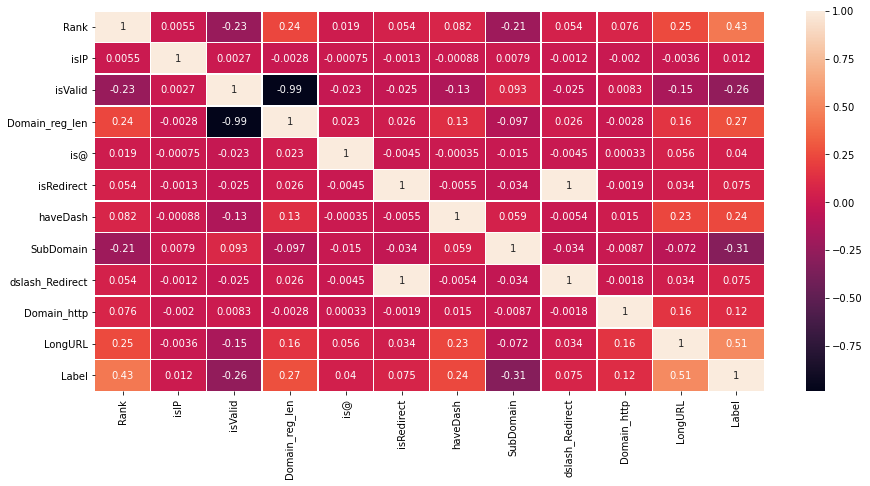

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(phishing_raw_df.corr(),annot=True, linewidth=0.5)

## Spliting the dataset into training set and testset in the ratio of 70 to 30

In [16]:
feature_columns = ['Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','dslash_Redirect','Domain_http','LongURL']
X=phishing_raw_df.drop(["Label"],axis=1)
Y=phishing_raw_df["Label"]
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(X,Y, test_size=0.3, random_state=17)

# Training the decision tree classifier

In [17]:
%%time
#Build the decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 5)
dtc=dtc.fit(features_train,target_train)

Wall time: 415 ms


In [18]:
%%time
y_pred=dtc.predict(features_test)

Wall time: 4.99 ms


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(target_test,y_pred))
print(classification_report(target_test,y_pred))

[[ 7301  2041]
 [ 1623 10744]]
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      9342
           1       0.84      0.87      0.85     12367

    accuracy                           0.83     21709
   macro avg       0.83      0.83      0.83     21709
weighted avg       0.83      0.83      0.83     21709



Decision tree with selected features

In [20]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(700,200))
_ = tree.plot_tree(dtc, feature_names=feature_columns,  class_names=['0','1'],filled=True)

In [21]:
feature_importance=(dict(zip(X.columns, dtc.feature_importances_)))
sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

In [ ]:
#selecting only important features
features_selected=['Rank','SubDomain','LongURL','Domain_reg_len','haveDash']
X=phishing_raw_df[features_selected]
Y=phishing_raw_df["Label"]
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(X,Y, test_size=0.3, random_state=17)

In [23]:
%%time
#training the dt
#Build the decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion = "entropy", random_state = 100,
            max_depth = 5)
dtc=dtc.fit(features_train,target_train)

[[ 7302  2040]
 [ 1658 10709]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      9342
           1       0.84      0.87      0.85     12367

    accuracy                           0.83     21709
   macro avg       0.83      0.82      0.83     21709
weighted avg       0.83      0.83      0.83     21709

Wall time: 95.7 ms


In [ ]:
%%time
#testing the dt
y_pred=dtc.predict(features_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(target_test,y_pred))
print(classification_report(target_test,y_pred))

average_precision_score 0.8037471542352896


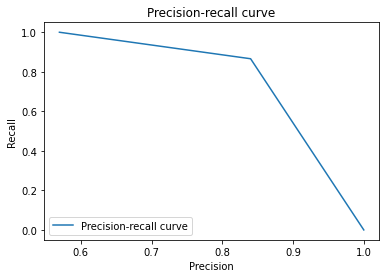

In [41]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(target_test, y_pred)

#create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

from sklearn.metrics import average_precision_score
print('average_precision_score',average_precision_score(target_test, y_pred))


# Training the neural network classifier with sklearn 

In [25]:
%%time
#training the neural network with 3 layers 
#features_train, features_test, target_train, target_test = train_test_split(X,Y, test_size=0.3, random_state=17)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12), activation='relu', solver='adam', max_iter=500)
mlp.fit(features_train,target_train)

Wall time: 7.7 s


MLPClassifier(hidden_layer_sizes=(12, 12, 12), max_iter=500)

In [26]:
%%time
#predicting the test data
predict_test = mlp.predict(features_test)

Wall time: 22 ms


In [27]:
#available functions=['identity', 'logistic', 'relu', 'softmax', 'tanh'].
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(target_test,predict_test))
print(classification_report(target_test,predict_test))

[[ 7301  2041]
 [ 1658 10709]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      9342
           1       0.84      0.87      0.85     12367

    accuracy                           0.83     21709
   macro avg       0.83      0.82      0.83     21709
weighted avg       0.83      0.83      0.83     21709



average_precision_score 0.8036901053490093


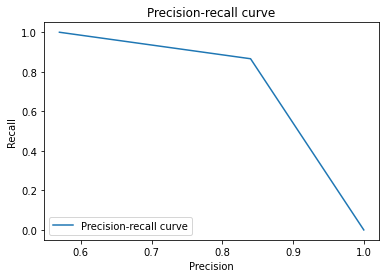

In [28]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(target_test, predict_test)

#create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

from sklearn.metrics import average_precision_score
print('average_precision_score',average_precision_score(target_test, predict_test))